In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import random

In [2]:

import numpy as np

import tensorflow as tf

train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='./curated_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='./curated_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 17104 files belonging to 3 classes.
Using 13684 files for training.
Found 17104 files belonging to 3 classes.
Using 3420 files for validation.


In [3]:
inputs = tf.keras.layers.Input(shape=(1,))
predictions = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.applications.ResNet50(weights=None,input_shape=(224,224,1),classes=3)
adam = optimizers.Adam(learning_rate = 0.003)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
initial_epochs = 15
history = model.fit(
  train_dataset,
  epochs=initial_epochs
)

Epoch 1/15
428/428 [==============================] - 142s 315ms/step - loss: 1.1146 - accuracy: 0.6226
Epoch 2/15
428/428 [==============================] - 135s 314ms/step - loss: 0.7667 - accuracy: 0.6880
Epoch 3/15
428/428 [==============================] - 135s 314ms/step - loss: 0.5209 - accuracy: 0.7977
Epoch 4/15
428/428 [==============================] - 136s 316ms/step - loss: 0.4089 - accuracy: 0.8425
Epoch 5/15
428/428 [==============================] - 135s 313ms/step - loss: 0.3358 - accuracy: 0.8773
Epoch 6/15
428/428 [==============================] - 137s 318ms/step - loss: 0.2432 - accuracy: 0.9117
Epoch 7/15
428/428 [==============================] - 134s 312ms/step - loss: 0.2081 - accuracy: 0.9212
Epoch 8/15
428/428 [==============================] - 136s 315ms/step - loss: 0.3220 - accuracy: 0.8804
Epoch 9/15
428/428 [==============================] - 136s 315ms/step - loss: 0.1460 - accuracy: 0.9445
Epoch 10/15
428/428 [==============================] - 135s 315m

In [6]:
results=model.evaluate(test_dataset)

107/107 [==============================] - 18s 155ms/step - loss: 0.0611 - accuracy: 0.9807


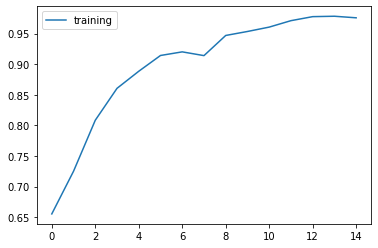

[0.8886922001838684, 0.672928512096405, 0.4863234758377075, 0.3605222702026367, 0.3050840198993683, 0.23125070333480835, 0.219811350107193, 0.2267676740884781, 0.14385327696800232, 0.1225527673959732, 0.108788400888443, 0.0762641578912735, 0.0651104599237442, 0.05988176539540291, 0.06918881833553314]
[0.6552177667617798, 0.7250072956085205, 0.8083893656730652, 0.8605670928955078, 0.888482928276062, 0.9142794609069824, 0.9201987981796265, 0.9140602350234985, 0.9470184445381165, 0.9535223841667175, 0.9606840014457703, 0.9712072610855103, 0.977784276008606, 0.9784419536590576, 0.9758842587471008]


In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.legend(['training'], loc = 'upper left')
plt.show()

# 각종 값 출력
print(history.history['loss'])
print(history.history['accuracy'])

In [8]:
results

[0.061061542481184006, 0.980701744556427]